<a href="https://colab.research.google.com/github/Tousside/news_correlation_10ac_week0/blob/task-2/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer

# Data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news_data= pd.read_csv('drive/MyDrive/data.csv.zip')

In [ ]:
news_data.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [ ]:
# get titles and  news body
df = news_data[['title','article']]
df.head()

,title,article
0,superstar chef yannick alléno brings refined f...,"pavyllon london, at four seasons hotel london ..."
1,nice claim top spot in ligue 1 with late win a...,nice moved into provisional first place in the...
2,amphibians are the world’s most vulnerable spe...,"the world’s frogs, salamanders, newts and othe..."
3,image: rusty red waters in madagascar,iron-rich sediment colors the red-orange water...
4,everything leaving max (formerly hbo max) in n...,"everything ends. no, i’m not having an existen..."


## world cloud for title and article body

# Preprocessing

In [ ]:

nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

#function to clean the texts
def clean_text(text):
    # delete dnltk.download('punkt') special characters
    text = re.sub(r"[^\w\s]", "", text)

    # text to lower case
    text = text.lower()

    # Tokenisation
    tokens = word_tokenize(text)

    # delete empty words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # join tokens
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [ ]:

# clean titles and bodies
df['processed_title'] = df['title'].apply(clean_text)
df['processed_body'] = df['article'].apply(clean_text)

df.head()

<ipython-input-8-368f85238361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_title'] = df['title'].apply(clean_text)


# Word Embeddings using tf-idf and cosine similarity computation

In [ ]:
def tf_idf_similarty(title, body):
  # cobine title and body in a list
  title_body=[title, body]

  # Create an instance of  TfidfVectorizer
  vectorizer = TfidfVectorizer()
  # get tf-idf scores
  tfidf_matrix = vectorizer.fit_transform(title_body)
  # title and body similarity score
  similarity_scores = cosine_similarity( tfidf_matrix , tfidf_matrix)
  return similarity_scores[0,1]



In [ ]:
similarities=[]
for title, body in zip(df['processed_title'],df['processed_body']):
  similarities.append(tf_idf_similarty(title, body))


In [ ]:
df['title_body_similarity_score']=similarities

In [ ]:
df.head()

In [ ]:
import seaborn as sns

In [ ]:
df['title_body_similarity_score'].describe()

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='title_body_similarity_score')
plt.xlabel('Similarity score between title and body')
plt.show()

# Articles with similarity greater or equal 0.5

In [ ]:
len(df[df['title_body_similarity_score']>=0.5])/df.shape[0]*100

In [ ]:
len(df[df['title_body_similarity_score']>=0.5])

Only 799 (1.37%) articles have similaty between their title and body greater or equal 0.5.

# Topic modeling

## Additional libraries

In [ ]:

import warnings
import spacy
from sklearn.datasets import fetch_20newsgroups
from string import punctuation
from spacy.lang.en.stop_words import STOP_WORDS
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [ ]:
data=df['processed_title']

# Load Spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
stopwords = list(STOP_WORDS)

# Processing data

In [ ]:
def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuation ]
    mytokens = [ word for word in mytokens if len(word) > 3]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
# Creating a list of documents from the complaints column
list_of_docs = data.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [spacy_tokenizer(doc).split() for doc in list_of_docs]

# Create Corpus using Bag of words

In [ ]:
words = corpora.Dictionary(doc_clean)
corpus = [words.doc2bow(doc) for doc in doc_clean]

# LDA Modeling

In [ ]:
lda_model = LdaModel(corpus=corpus, id2word=words, num_topics=10, random_state=2, update_every=1,\
                                 passes=10, alpha='auto')

#Word Could

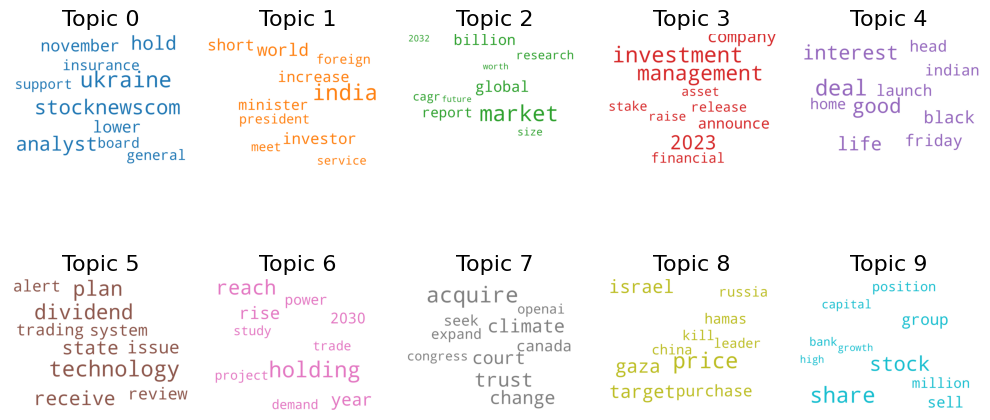

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,6), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=1, y=1)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()

# categorise the title/content into a known set of topic categories

In [ ]:
# torch and KeyBERT to extract keyword
# if you found kernel issue after import the keybert, you have to import the torch before the keybert
import torch
from keybert import KeyBERT

import pandas as pd
import numpy as np
import string
string.punctuation
import datetime

# initialize now as filename
now = datetime.datetime.today().strftime('%d_%m_%Y')

# nltk to nlp preprocessing
import nltk
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize

# initialize KeyBERT model
kw_model = KeyBERT()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# define preprocessing function
def preprocessing(text):
    # join title, set title as lower, replace several string from title, and tokenize title
    title = text
    title = "".join([i for i in title if i not in string.punctuation])
    title = title.lower()
    title = title.replace("alqur’an", "alquran")
    title = title.replace("qur’an", "quran")
    title = word_tokenize(title)

    # initialize stopwords and extend several word to the stop_list
    stopwords = nltk.corpus.stopwords.words('english')
    stop_list = ['database', '20112020']
    stopwords.extend(stop_list)

    # remove stop words
    title = [i for i in title if i not in stopwords]

    # join title into string
    title = " ".join([i for i in title if i not in string.punctuation])
    return title

In [ ]:
# apply function to data
df['title']= df['processed_title'].apply(lambda x:preprocessing(x))

<ipython-input-42-68001f04fce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title']= df['processed_title'].apply(lambda x:preprocessing(x))


In [ ]:
# initialize model and apply lambda function to join the keywords as a string
# parameter descriptions
"""
    top_n: the number of keywords(phrases) extracted for each row
    stop_words: type of language to remove stop words
    n_gram_range:
    length of the word or phrase to be extracted,
    if the value is (3, 3) then it will extract 3 phrases with each phrase consisting of 3 words
    diversity: parameter level of similarity between words or phrases
"""
extract_kw = lambda x: ', '.join(k[0] for k in kw_model.extract_keywords(x, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, top_n=3, diversity=0.5))

# apply function to the 'topics' column
df['topics'] = df['title'].apply(extract_kw)

In [ ]:
df.head()

# Which websites reported the most diverse topics?

In [ ]:
news_data['topics']=df["topics"]

In [ ]:
news_data.to_csv("topic_data")

In [ ]:
news_data.head()

# Analyse the topic trends. For example, plot a 2D scatter plot such that x-axis is date, y-axis is the topics, and the color represents the count of the topic in that particular date. What  are the observed trends?


# Model the events that the news articles are written about (this is the most challenging part of this project).

# How many events are covered in the data?


# Analyse which news sites report events the earliest?


# Which events have the highest reporting?


# What is the correlation between news sites reporting events?
